# Import Library

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

# Load Dataset

In [3]:
data = pd.read_csv('Loan.csv')

# Data Understanding

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning and Preprocessing

### Check Duplicate Data

In [8]:
data.drop_duplicates(inplace= True)
data.shape

(614, 13)

### Check Data Types

In [9]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Check Missing Values

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Impute Missing Value

#### Checking Outliers in Numerical Variables

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

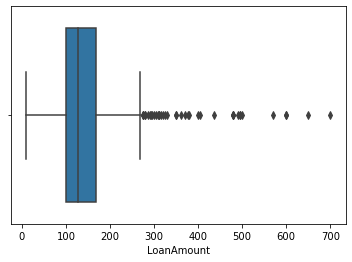

In [11]:
sns.boxplot(data["LoanAmount"])

#### Filling Missing Value with Mode (Categorical Variable) and Median (Numerical Variable)

In [13]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Dealing With Incorrect Variable Types

#### The Incorrect Variables is Credit_History

In [17]:
data.Credit_History.value_counts(dropna = False)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [19]:
data["Credit_History"]=data["Credit_History"].astype("int64")

In [20]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

### Outlier Detection

In [21]:
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [23]:
outlier(data["ApplicantIncome"])

Number of Outlier 50
Outlier observation row:
9
34
54
67
102
106
115
119
126
128
130
138
144
146
155
171
183
185
191
199
254
258
271
278
284
308
324
333
369
370
409
424
432
438
443
467
475
478
483
487
493
506
509
525
533
534
561
572
594
604


In [27]:
Q1=data["ApplicantIncome"].quantile(0.25)
Q3=data["ApplicantIncome"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["ApplicantIncome"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1,Urban,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0,Urban,N


In [32]:
data.loc[(data["ApplicantIncome"]>upper_range),"ApplicantIncome"]=upper_range
data.loc[(data["ApplicantIncome"]<lower_range),"ApplicantIncome"]=lower_range

outlier(data["ApplicantIncome"])

Number of Outlier 0


In [24]:
outlier(data["CoapplicantIncome"])

Number of Outlier 18
Outlier observation row:
9
12
38
122
135
177
180
253
349
372
402
417
444
506
513
523
581
600


In [28]:
Q1=data["CoapplicantIncome"].quantile(0.25)
Q3=data["CoapplicantIncome"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["CoapplicantIncome"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1,Rural,Y


In [33]:
data.loc[(data["CoapplicantIncome"]>upper_range),"CoapplicantIncome"]=upper_range
data.loc[(data["CoapplicantIncome"]<lower_range),"CoapplicantIncome"]=lower_range

outlier(data["CoapplicantIncome"])

Number of Outlier 0


In [25]:
outlier(data["LoanAmount"])

Number of Outlier 41
Outlier observation row:
5
9
21
34
54
67
83
126
130
135
155
161
171
177
233
253
258
260
278
308
324
325
333
351
369
372
381
391
409
432
487
506
514
523
525
536
561
572
592
600
604


In [29]:
Q1=data["LoanAmount"].quantile(0.25)
Q3=data["LoanAmount"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["LoanAmount"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1,Urban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1,Semiurban,N


In [34]:
data.loc[(data["LoanAmount"]>upper_range),"LoanAmount"]=upper_range
data.loc[(data["LoanAmount"]<lower_range),"LoanAmount"]=lower_range

outlier(data["LoanAmount"])

Number of Outlier 0


In [26]:
outlier(data["Loan_Amount_Term"])

Number of Outlier 88
Outlier observation row:
14
16
62
66
68
72
75
78
84
91
94
98
100
109
115
128
130
133
142
144
155
164
168
171
172
179
182
186
189
202
228
231
241
242
245
247
248
253
262
282
286
293
298
313
315
333
334
355
358
363
366
372
373
375
378
385
393
400
401
408
429
435
444
451
453
461
466
471
476
495
497
500
504
513
516
539
540
546
554
573
575
585
590
591
593
600
605
610


In [30]:
Q1=data["Loan_Amount_Term"].quantile(0.25)
Q3=data["Loan_Amount_Term"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Loan_Amount_Term"]>upper_range),:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1,Urban,N
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1,Semiurban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1,Urban,Y
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0,Semiurban,N
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0,Urban,N
228,LP001760,Male,Yes,0,Graduate,No,4758,0.0,158.0,480.0,1,Semiurban,Y
248,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1,Semiurban,Y
293,LP001945,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0,Urban,N
298,LP001955,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1,Rural,N
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0,Urban,N


In [35]:
data.loc[(data["Loan_Amount_Term"]>upper_range),"Loan_Amount_Term"]=upper_range
data.loc[(data["Loan_Amount_Term"]<lower_range),"Loan_Amount_Term"]=lower_range

outlier(data["Loan_Amount_Term"])

Number of Outlier 0


# Feature Engineering

### Encoding Variables

In [36]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols   = data.nunique()[data.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi value columns
data=pd.get_dummies(data = data,columns = multi_cols,drop_first=True)

In [37]:
data

,Loan_ID,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,1,1,0,0,0,0,1
1,LP001003,1,1,0,0,1,0,1,0,0,0,0
2,LP001005,1,1,0,1,1,1,0,0,0,0,1
3,LP001006,1,1,1,0,1,1,0,0,0,0,1
4,LP001008,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,1,1,0,0,0,0,0
610,LP002979,1,1,0,0,1,1,0,0,1,0,0
611,LP002983,1,1,0,0,1,1,1,0,0,0,1
612,LP002984,1,1,0,0,1,1,0,1,0,0,1


## Data Partition

In [38]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = .20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
cols    = [i for i in data.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Synthetic Minority Over-sampling Technique (SMOTE)

In [39]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

In [40]:
#Proportion before smote
train_Y["Loan_Status"].value_counts()

1    336
0    155
Name: Loan_Status, dtype: int64

In [41]:
#Proportion after smote
train_smote_Y["Loan_Status"].value_counts()

1    336
0    336
Name: Loan_Status, dtype: int64